In [35]:
import os
import numpy as np
#Import required Image library
from PIL import Image, ImageFilter

"""
directory = 'C:\\Users\\etien\\Documents\\coolgames\\fleches\\bas'
i=0
for filename in os.listdir(directory):
        OriImage = Image.open(directory+'\\'+filename) 
        #OriImage.show()
        print(np.shape(OriImage))
        blurImage = OriImage.filter(ImageFilter.GaussianBlur(radius=20))
        blurImage.save('C:\\Users\\etien\\Documents\\coolgames\\fleches\\bas\\flou'+str(i)+'.jpg')
        i+=1

directory = 'C:\\Users\\etien\\Documents\\coolgames\\fleches\\haut'
i=0
for filename in os.listdir(directory):
        OriImage = Image.open(directory+'\\'+filename) 
        #OriImage.show()
        print(np.shape(OriImage))
        blurImage = OriImage.filter(ImageFilter.GaussianBlur(radius=20))
        blurImage.save('C:\\Users\\etien\\Documents\\coolgames\\fleches\\haut\\flou'+str(i)+'.jpg')
        i+=1

directory = 'C:\\Users\\etien\\Documents\\coolgames\\fleches\\gauche'
i=0
for filename in os.listdir(directory):
        OriImage = Image.open(directory+'\\'+filename) 
        #OriImage.show()
        print(np.shape(OriImage))
        blurImage = OriImage.filter(ImageFilter.GaussianBlur(radius=20))
        blurImage.save('C:\\Users\\etien\\Documents\\coolgames\\fleches\\gauche\\flou'+str(i)+'.jpg')
        i+=1

directory = 'C:\\Users\\etien\\Documents\\coolgames\\fleches\\droite'
i=0
for filename in os.listdir(directory):
        OriImage = Image.open(directory+'\\'+filename) 
        #OriImage.show()
        print(np.shape(OriImage))
        blurImage = OriImage.filter(ImageFilter.GaussianBlur(radius=20))
        blurImage.save('C:\\Users\\etien\\Documents\\coolgames\\fleches\\droite\\flou'+str(i)+'.jpg')
        i+=1
        
        
directory = 'C:\\Users\\etien\\Documents\\coolgames\\fleches\\rien'
i=0
for filename in os.listdir(directory):
        OriImage = Image.open(directory+'\\'+filename) 
        #OriImage.show()
        print(np.shape(OriImage))
        blurImage = OriImage.filter(ImageFilter.GaussianBlur(radius=20))
        blurImage.save('C:\\Users\\etien\\Documents\\coolgames\\fleches\\rien\\flou'+str(i)+'.jpg')
        i+=1
"""

"\ndirectory = 'C:\\Users\\etien\\Documents\\coolgames\\fleches\\bas'\ni=0\nfor filename in os.listdir(directory):\n        OriImage = Image.open(directory+'\\'+filename) \n        #OriImage.show()\n        print(np.shape(OriImage))\n        blurImage = OriImage.filter(ImageFilter.GaussianBlur(radius=20))\n        blurImage.save('C:\\Users\\etien\\Documents\\coolgames\\fleches\\bas\\flou'+str(i)+'.jpg')\n        i+=1\n\ndirectory = 'C:\\Users\\etien\\Documents\\coolgames\\fleches\\haut'\ni=0\nfor filename in os.listdir(directory):\n        OriImage = Image.open(directory+'\\'+filename) \n        #OriImage.show()\n        print(np.shape(OriImage))\n        blurImage = OriImage.filter(ImageFilter.GaussianBlur(radius=20))\n        blurImage.save('C:\\Users\\etien\\Documents\\coolgames\\fleches\\haut\\flou'+str(i)+'.jpg')\n        i+=1\n\ndirectory = 'C:\\Users\\etien\\Documents\\coolgames\\fleches\\gauche'\ni=0\nfor filename in os.listdir(directory):\n        OriImage = Image.open(directo

In [36]:
!pip3 install tensorflow 
import tensorflow as tf

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

(640, 480, 3)


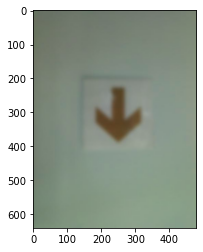

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
DATADIR= 'C:\\Users\\etien\\Documents\\coolgames\\cnn'
CATEGORIES= ["bas", "droite", "gauche", "haut","rien"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        #img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        print(img_array.shape)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break 

In [38]:
training_data = []

IMG_WIDTH = 224
IMG_HEIGHT = 224

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))  # resize to normalize data size
                #training_data.append([new_array, class_num])  # add this to our training_data
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 10/10 [00:00<00:00, 501.30it/s]

793


In [39]:
import random

random.shuffle(training_data)
for sample in training_data[:20]:
    print(sample[1])

3
0
3
0
0
1
2
2
0
2
0
1
1
1
3
2
2
1
3
2


In [40]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

for img in X:
  print(img.shape)

X = np.array(X).reshape(-1, IMG_WIDTH, IMG_HEIGHT, 3)
print(X[0].shape)

#X = np.array(X) #.reshape(-1, 640, 480, 1)

#X=np.array(X)
#X = X.reshape(-1,X[0].shape[0],X[0].shape[1],1)
#y doit ^etre en one hot
print(len(y))
plt.show()
a=np.array(y)
y = np.zeros((a.size, a.max()+1))
y[np.arange(a.size),a] = 1
print(y)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [41]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
#from tensorflow.keras.datasets import mnist
#from google.colab import projet
from tensorflow.keras.utils import to_categorical

In [43]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds

In [44]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
print(type(X), ": ", X.shape)

<class 'numpy.ndarray'> :  (793, 224, 224, 3)


In [45]:
X = X/255.0
model = Sequential()


model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu',input_shape=X.shape[1:])) #[1:]
model.add(MaxPool2D(pool_size=(4, 4), strides=None))
model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None))
model.add(Conv2D(filters=1, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None))

model.add(Flatten())
#model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=5, activation='softmax'))#units=5=nb de classes relation obligatoire pour la couche de sortie
model.summary()

#
y = np.array(y)
X = np.array(X)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X, y, batch_size=32, epochs=15, validation_split=0.3)
#Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 480, 640)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 32)        32800     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 1)         289       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 1)       

In [46]:
model.save('C:\\Users\\etien\\Documents\\coolgames\\modelsauve')

INFO:tensorflow:Assets written to: C:\Users\etien\Documents\coolgames\modelsauve\assets


In [47]:
# Convert the model.
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()



""""
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()



# Save the model.
with open('C:\\Users\\etien\\Documents\\modelsmallconv.tflite', 'wb') as f:
  f.write(tflite_model)
"""


converter=tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations=[tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types=[tf.float16]
tflite_quant_model=converter.convert()


with open('C:\\Users\\etien\\Documents\\modelsmalladri.tflite', 'wb') as f:
  f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: C:\Users\etien\AppData\Local\Temp\tmp8y4fyml6\assets


In [48]:
def representative_dataset():
    for _ in range(100):
      data = np.random.rand(1, 244, 244, 3)
      yield [data.astype(np.float32)]

In [49]:
""""import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

with open('C:\\Users\\etien\\Documents\\modelsmallbien.tflite', 'wb') as f:
  f.write(tflite_quant_model)"""

'"import tensorflow as tf\nconverter = tf.lite.TFLiteConverter.from_keras_model(model)\nconverter.optimizations = [tf.lite.Optimize.DEFAULT]\nconverter.representative_dataset = representative_dataset\nconverter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]\nconverter.inference_input_type = tf.int8  # or tf.uint8\nconverter.inference_output_type = tf.int8  # or tf.uint8\ntflite_quant_model = converter.convert()\n\nwith open(\'C:\\Users\\etien\\Documents\\modelsmallbien.tflite\', \'wb\') as f:\n  f.write(tflite_quant_model)'